In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import math

%matplotlib inline

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

#plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_parquet('../data/tokyo-clean.parquet')

In [3]:
data.head()

,Type,Region,Municipality,DistrictName,TradePriceYen,FloorPlan,Area,LandShape,Frontage,TotalFloorArea,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
0,"Pre-owned Condominiums, etc.",None,千代田区 (Chiyoda Ward),Kandasudacho,17000000,1K,25,None,NaN,<NA>,...,80,800,Done,None,False,False,False,2010,2,2010-06-30
1,"Pre-owned Condominiums, etc.",None,千代田区 (Chiyoda Ward),Yombancho,83000000,2LDK,65,None,NaN,<NA>,...,80,500,Not yet,None,False,False,False,2010,2,2010-06-30
2,Residential Land(Land and Building),Commercial Area,千代田区 (Chiyoda Ward),None,170000000,None,135,Rectangular Shaped,8.0,630,...,80,500,None,None,False,False,False,2010,2,2010-06-30
3,Residential Land(Land and Building),Commercial Area,千代田区 (Chiyoda Ward),Fujimi,150000000,None,50,Trapezoidal Shaped,6.0,220,...,80,500,None,None,False,False,False,2010,2,2010-06-30
4,"Pre-owned Condominiums, etc.",None,千代田区 (Chiyoda Ward),Hirakawacho,130000000,1LDK,80,None,NaN,<NA>,...,60,400,Not yet,None,False,False,False,2010,2,2010-06-30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517025 entries, 0 to 517024
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Type                       517025 non-null  object        
 1   Region                     166429 non-null  object        
 2   Municipality               517025 non-null  object        
 3   DistrictName               516987 non-null  object        
 4   TradePriceYen              517025 non-null  int64         
 5   FloorPlan                  340256 non-null  object        
 6   Area                       517025 non-null  int64         
 7   LandShape                  166374 non-null  object        
 8   Frontage                   151571 non-null  float64       
 9   TotalFloorArea             183219 non-null  Int64         
 10  BuildingYear               499008 non-null  Int64         
 11  Structure                  502224 non-null  object  

In [5]:
data.describe(include='all')

,Type,Region,Municipality,DistrictName,TradePriceYen,FloorPlan,Area,LandShape,Frontage,TotalFloorArea,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
count,517025,166429,517025,516987,5.170250e+05,340256,517025.000000,166374,151571.000000,183219.0,...,422255.0,422249.0,211404,23878,517025,517025,517025,517025.000000,517025.000000,517025
unique,2,4,59,1439,NaN,66,NaN,9,NaN,<NA>,...,<NA>,<NA>,2,21,2,2,2,NaN,NaN,NaN
top,"Pre-owned Condominiums, etc.",Residential Area,世田谷区 (Setagaya Ward),Honcho,NaN,3LDK,NaN,Semi-rectangular Shaped,NaN,<NA>,...,<NA>,<NA>,Not yet,Dealings including private road,False,False,False,NaN,NaN,NaN
freq,326411,150675,31042,3502,NaN,95437,NaN,58024,NaN,<NA>,...,<NA>,<NA>,151606,17659,516775,516913,516749,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.271026e+07,NaN,80.847212,NaN,15.929273,154.075281,...,63.050811,276.443355,NaN,NaN,NaN,NaN,NaN,2018.616051,2.447870,2019-03-23 14:49:43.427107072
min,NaN,NaN,NaN,NaN,3.400000e+06,NaN,10.000000,NaN,0.700000,5.0,...,20.0,15.0,NaN,NaN,NaN,NaN,NaN,2010.000000,1.000000,2010-03-31 00:00:00
25%,NaN,NaN,NaN,NaN,2.400000e+07,NaN,45.000000,NaN,5.500000,85.0,...,60.0,150.0,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,2015-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,3.800000e+07,NaN,65.000000,NaN,7.800000,95.0,...,60.0,200.0,NaN,NaN,NaN,NaN,NaN,2020.000000,2.000000,2020-03-31 00:00:00
75%,NaN,NaN,NaN,NaN,5.900000e+07,NaN,95.000000,NaN,10.500000,115.0,...,80.0,400.0,NaN,NaN,NaN,NaN,NaN,2022.000000,3.000000,2022-12-31 00:00:00
max,NaN,NaN,NaN,NaN,8.000000e+08,NaN,1900.000000,NaN,9999.900000,9999.0,...,501.0,4080.0,NaN,NaN,NaN,NaN,NaN,2025.000000,4.000000,2025-06-30 00:00:00


In [6]:
# number of missing values

data.isnull().sum().sort_values(ascending=False)

Remarks                      493147
Frontage                     365454
LandShape                    350651
Region                       350596
TotalFloorArea               333806
Breadth                      332381
Classification               330827
RoadDirection                330240
Renovation                   305621
Purpose                      231320
FloorPlan                    176769
Use                          154235
FloorAreaRatio                94776
CoverageRatio                 94770
BuildingYear                  18017
Structure                     14801
CityPlanning                  13063
DistrictName                     38
TotalFloorAreaCapped              0
FrontageCapped                    0
TransactionYear                   0
TransactionQuarter                0
Type                              0
BuildingYearFloored               0
Area                              0
TradePriceYen                     0
Municipality                      0
TransactionQuarterEndDate   

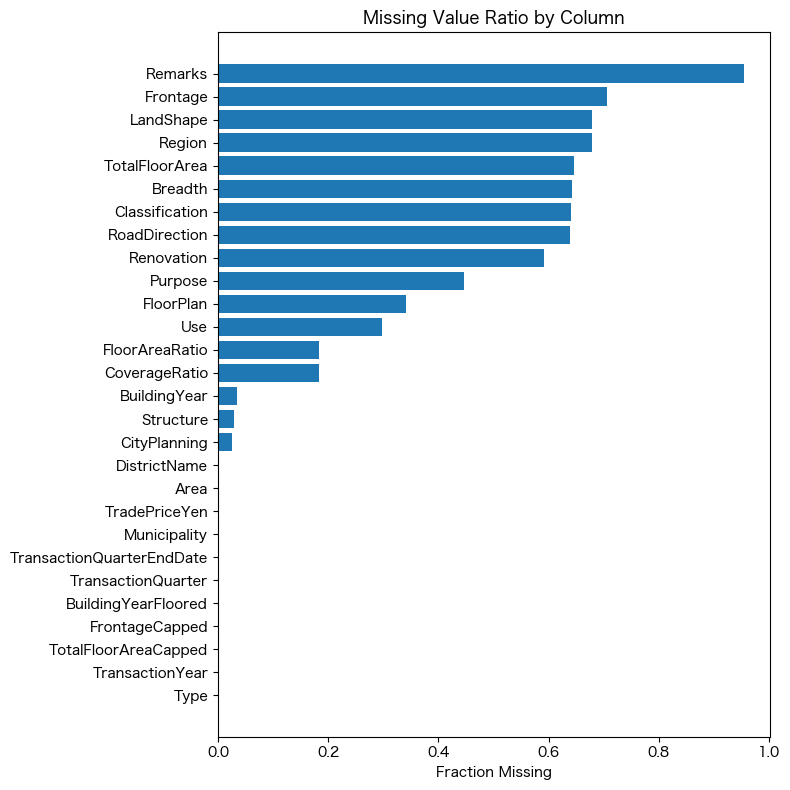

In [7]:
# proportion of missing values

missing_ratio = data.isna().mean().sort_values()

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(missing_ratio.index, missing_ratio.values)
ax.set_title("Missing Value Ratio by Column")
ax.set_xlabel("Fraction Missing")
plt.tight_layout()

In [8]:
# number of unique values for each column

data.nunique().sort_values()

Type                            2
TotalFloorAreaCapped            2
FrontageCapped                  2
BuildingYearFloored             2
Renovation                      2
Region                          4
TransactionQuarter              4
Purpose                         6
RoadDirection                   9
LandShape                       9
Classification                 15
CityPlanning                   16
TransactionYear                16
Remarks                        21
Structure                      24
CoverageRatio                  40
Municipality                   59
TransactionQuarterEndDate      62
FloorPlan                      66
BuildingYear                   83
FloorAreaRatio                120
TotalFloorArea                156
Area                          170
Use                           212
TradePriceYen                 227
Breadth                       360
Frontage                      435
DistrictName                 1439
dtype: int64

In [9]:
# number of unique values for each categorical column
# Use and DistrictName need to be handle specially for XGBoost

print(data.select_dtypes(include='object').nunique().sort_values(ascending=False))

DistrictName      1439
Use                212
FloorPlan           66
Municipality        59
Structure           24
Remarks             21
CityPlanning        16
Classification      15
LandShape            9
RoadDirection        9
Purpose              6
Region               4
Type                 2
Renovation           2
dtype: int64


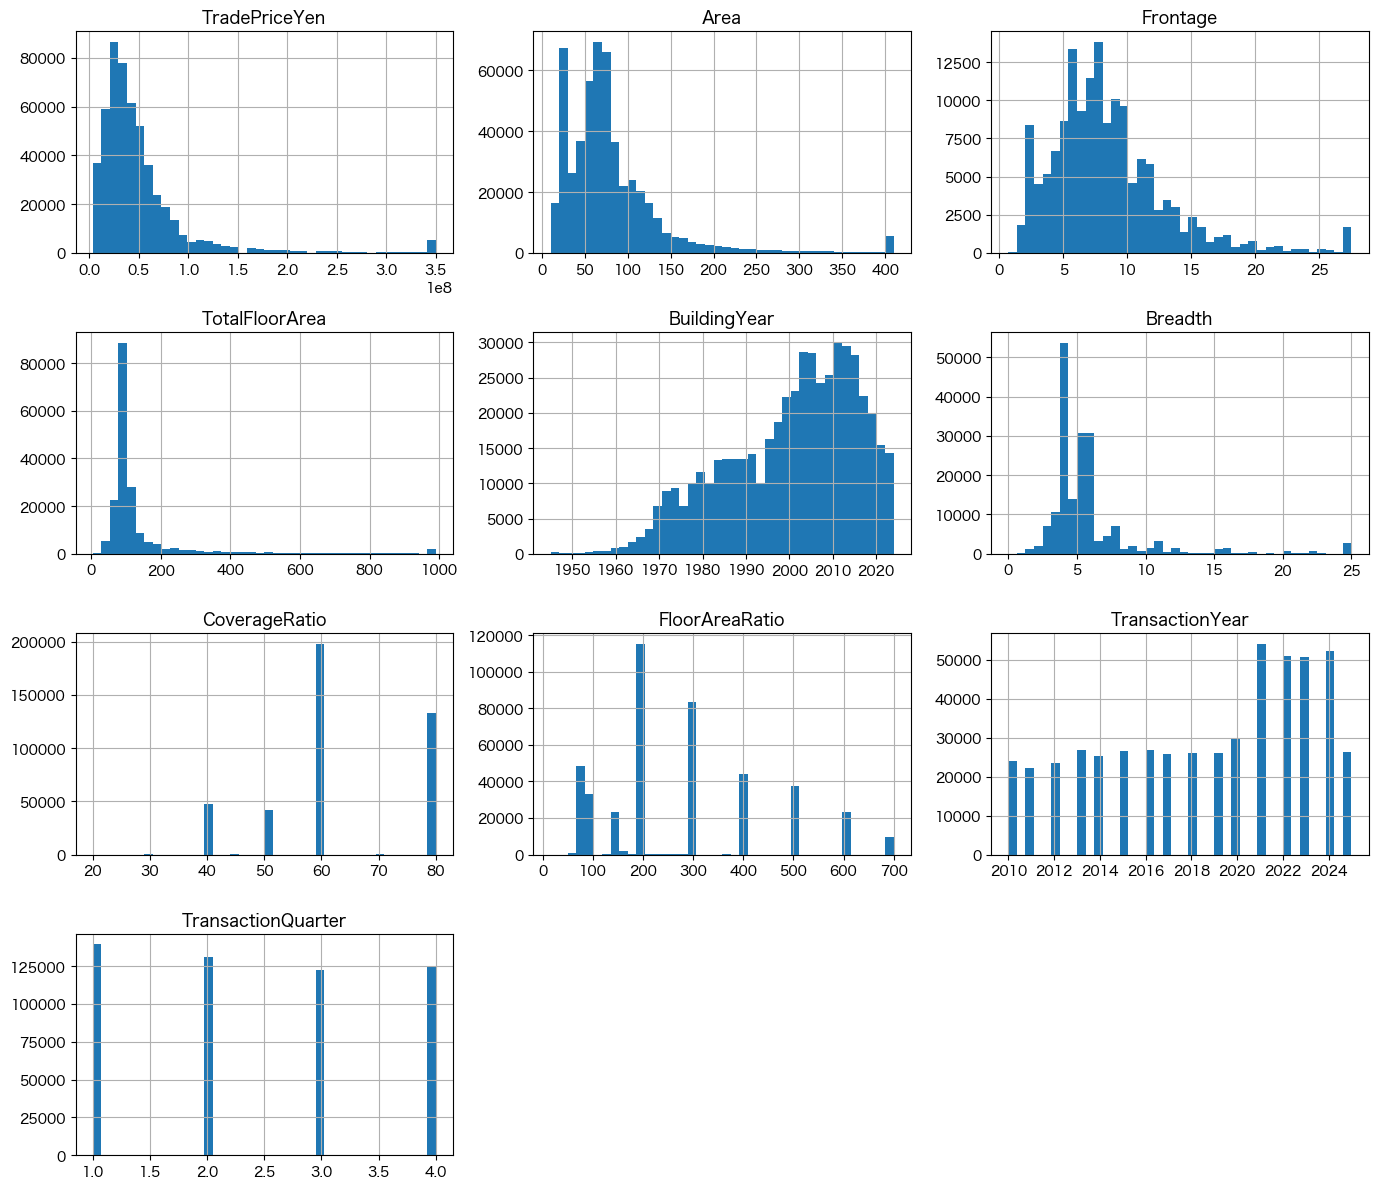

In [10]:
num_cols = data.select_dtypes(include='number').columns

# clip each numeric column at its 99th percentile
clipped = data[num_cols].clip(upper=data[num_cols].quantile(0.99), axis=1)

clipped.hist(figsize=(14, 12), bins=40)
plt.tight_layout()

In [11]:
# correlations

corr = data.corr(numeric_only=True)
corr.sort_values(by="TradePriceYen", ascending=False)

,TradePriceYen,Area,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter
TradePriceYen,1.000000,0.501445,0.067828,0.431562,0.099183,0.260061,0.021282,0.031613,0.001501,0.054631,0.151843,0.103781,-0.006512
Area,0.501445,1.000000,0.229518,0.432177,-0.048355,0.139337,-0.287429,-0.287790,0.008218,0.183245,0.201715,-0.055717,-0.000423
TotalFloorArea,0.431562,0.432177,0.125495,1.000000,-0.107888,0.185534,0.139764,0.184039,0.003734,0.115877,0.924154,-0.034229,-0.001979
Breadth,0.260061,0.139337,0.027552,0.185534,-0.111779,1.000000,0.241821,0.332540,-0.000165,0.024714,0.071547,-0.026831,0.000813
TotalFloorAreaCapped,0.151843,0.201715,0.095952,0.924154,-0.020636,0.071547,0.010117,0.010272,0.003301,0.090697,1.000000,-0.014617,-0.001236
TransactionYear,0.103781,-0.055717,0.001240,-0.034229,0.116828,-0.026831,-0.010559,-0.028304,-0.010809,-0.004414,-0.014617,1.000000,-0.070587
BuildingYear,0.099183,-0.048355,-0.024403,-0.107888,1.000000,-0.111779,-0.145893,-0.137807,-0.082302,-0.010465,-0.020636,0.116828,-0.005803
Frontage,0.067828,0.229518,1.000000,0.125495,-0.024403,0.027552,0.002806,-0.000721,-0.000723,0.999841,0.095952,0.001240,-0.001929
FrontageCapped,0.054631,0.183245,0.999841,0.115877,-0.010465,0.024714,-0.006055,-0.008832,-0.000324,1.000000,0.090697,-0.004414,-0.000486
FloorAreaRatio,0.031613,-0.287790,-0.000721,0.184039,-0.137807,0.332540,0.819745,1.000000,0.004097,-0.008832,0.010272,-0.028304,0.004044


<Axes: >

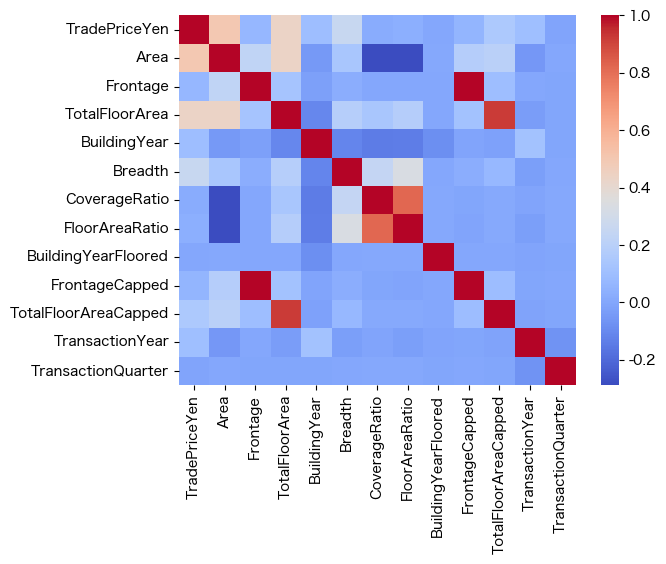

In [12]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')

In [13]:
# Japanese-style 万円 formatter
def yen_man_formatter(x, pos):
    return f"{x/1e4:,.0f}万円"

# add log trade price
latest_year = data['TransactionYear'].max()

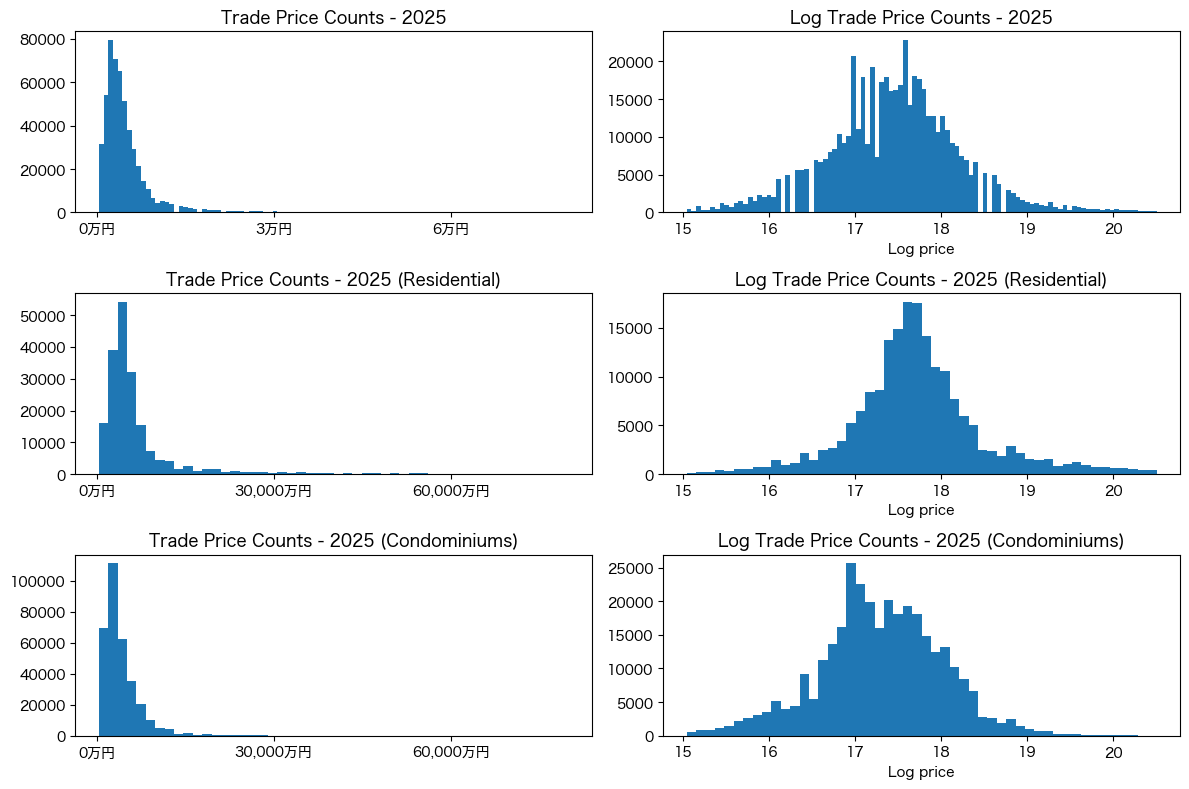

In [14]:
# todo: clip these to remove the outliers that are extending the linear plot

data['LogTradePriceYen'] = np.log(data['TradePriceYen'])

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Linear - all
axes[0, 0].hist(data['TradePriceYen']/1e4, bins=100)
axes[0, 0].set_title(f"Trade Price Counts - {latest_year}")
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - all
axes[0, 1].hist(data['LogTradePriceYen'], bins=100)
axes[0, 1].set_title(f"Log Trade Price Counts - {latest_year}")
axes[0, 1].set_xlabel("Log price")

# Linear - residential
axes[1, 0].hist(data[data['Type'] == 'Residential Land(Land and Building)']['TradePriceYen'], bins=50)
axes[1, 0].set_title(f"Trade Price Counts - {latest_year} (Residential)")
axes[1, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - residential
axes[1, 1].hist(data[data['Type'] == 'Residential Land(Land and Building)']['LogTradePriceYen'], bins=50)
axes[1, 1].set_title(f"Log Trade Price Counts - {latest_year} (Residential)")
axes[1, 1].set_xlabel("Log price")

# Linear - condominiums
axes[2, 0].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['TradePriceYen'], bins=50)
axes[2, 0].set_title(f"Trade Price Counts - {latest_year} (Condominiums)")
axes[2, 0].xaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
axes[2, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - condominiums
axes[2, 1].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['LogTradePriceYen'], bins=50)
axes[2, 1].set_title(f"Log Trade Price Counts - {latest_year} (Condominiums)")
axes[2, 1].set_xlabel("Log price")

plt.tight_layout()

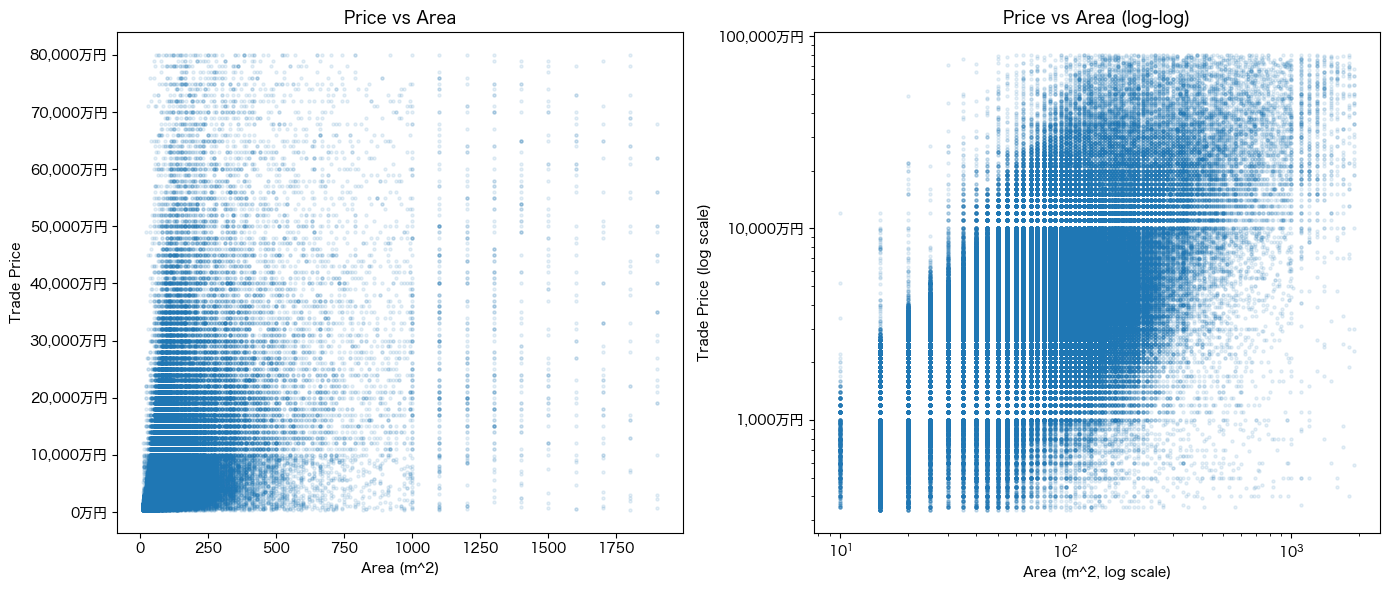

In [15]:
# plot log-log to adjust visualization for skew on the visualization
# note that MLIT rounds lot sizes 

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(data['Area'], data['TradePriceYen'], s=5, alpha=0.1)
ax[0].set_xlabel("Area (m^2)")
ax[0].set_ylabel("Trade Price")
ax[0].yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
ax[0].set_title("Price vs Area")

ax[1].scatter(data['Area'], data['TradePriceYen'], s=5, alpha=0.1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel("Area (m^2, log scale)")
ax[1].set_ylabel("Trade Price (log scale)")
ax[1].yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
ax[1].set_title("Price vs Area (log-log)")

plt.tight_layout()

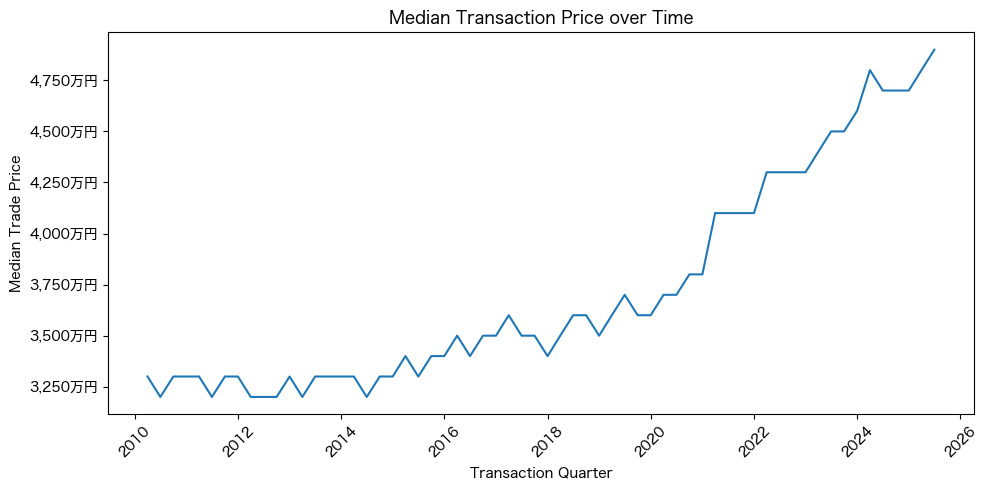

In [16]:
# time series of median trade prices

ts = (
    data
    .groupby('TransactionQuarterEndDate')['TradePriceYen']
    .median()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts.index, ts.values)
ax.set_title("Median Transaction Price over Time")
ax.set_xlabel("Transaction Quarter")
ax.set_ylabel("Median Trade Price")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45)
plt.tight_layout()


Most Expensive Municipalities - Median Transaction Prices (万円):
Municipality
港区 (Minato Ward)       11000
中央区 (Chuo Ward)        10000
渋谷区 (Shibuya Ward)      8200
千代田区 (Chiyoda Ward)     7900
目黒区 (Meguro Ward)       7700
Name: TradePriceYen, dtype: int64

Least Expensive Municipalities - Median Transaction Prices (万円):
Municipality
世田谷区 (Setagaya Ward)     7000
品川区 (Shinagawa Ward)     6600
杉並区 (Suginami Ward)      6500
武蔵野市 (Musashino City)    6500
江東区 (Koto Ward)          6200
Name: TradePriceYen, dtype: int64



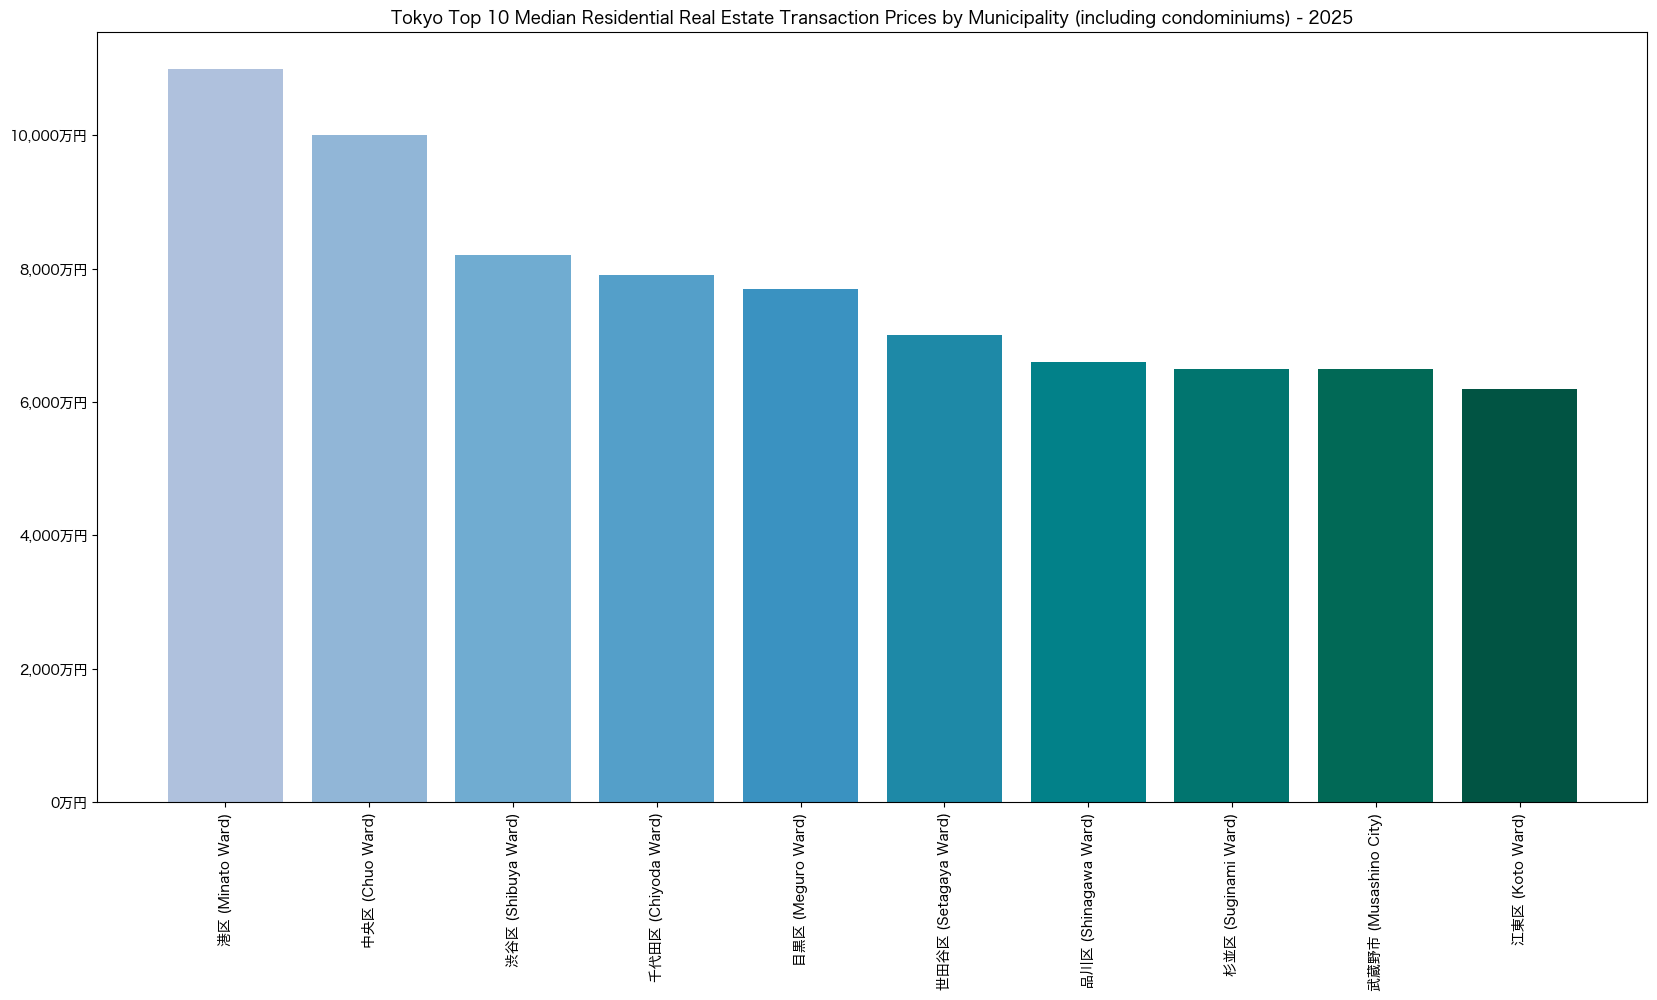

In [17]:
# Sorted average price series in 万円, for residential real estate in the most recent year available
med_prices = (data[(data['TransactionYear'] == latest_year)]
                      .groupby('Municipality')['TradePriceYen']
                      .median()
                      .sort_values(ascending=False)).head(10)

print("Most Expensive Municipalities - Median Transaction Prices (万円):")
print((med_prices.head()/1e4).astype(int))
print()

print("Least Expensive Municipalities - Median Transaction Prices (万円):")
print((med_prices.tail()/1e4).astype(int))
print()


fig, ax = plt.subplots(figsize=(20, 10))
colors = plt.cm.PuBuGn(np.linspace(0.35, 0.95, len(med_prices)))

ax.bar(med_prices.index, med_prices.values, color=colors)
ax.set_title(f"Tokyo Top 10 Median Residential Real Estate Transaction Prices by Municipality (including condominiums) - {latest_year}")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))

plt.xticks(rotation=90)
plt.show()

Is_Ward
0    ¥38,000,000
1    ¥54,000,000
Name: TradePriceYen, dtype: object


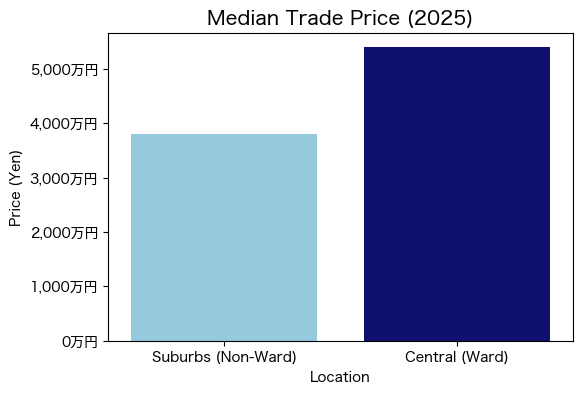

In [18]:
# properties in wards (central Tokyo) tend to have higher prices

# Create the binary flag for 23 Special Wards
# 1 = Central Tokyo (Ward), 0 = Western Tokyo/Islands (City/Town/Village)
data['Is_Ward'] = data['Municipality'].str.contains('区', case=False).astype(int)

# Filter for latest year
df_2025 = data[data['TransactionYear'] == latest_year]

# 1. The Raw Numbers (Median)
print(df_2025.groupby('Is_Ward')['TradePriceYen'].median().apply(lambda x: f"¥{x:,.0f}"))

# 2. The Visualization
plt.figure(figsize=(6, 4))
sns.barplot(data=df_2025, x='Is_Ward', y='TradePriceYen', estimator='median', errorbar=None, palette=['skyblue', 'navy'])
plt.xticks([0, 1], ['Suburbs (Non-Ward)', 'Central (Ward)']) # Label 0 and 1 explicitly
plt.title('Median Trade Price (2025)', fontsize=14)
plt.ylabel('Price (Yen)')
plt.xlabel('Location')
plt.gca().yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.show()


/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_48957/3553845934.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_price = tmp.groupby('AgeBin')['TradePriceYen'].median()


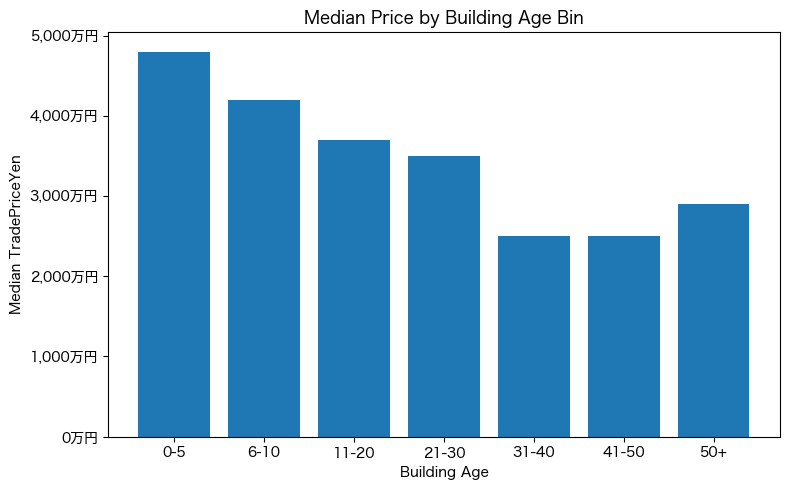

In [19]:
# Filter out missing / weird years
mask = (data['BuildingYearFloored'] == 0) & (data['BuildingYear'] <= data['TransactionYear'])
tmp = data[mask].copy()
tmp['BuildingAge'] = tmp['TransactionYear'] - tmp['BuildingYear']

# Bin ages
bins = [0, 5, 10, 20, 30, 40, 50, 100]
labels = ["0-5", "6-10", "11-20", "21-30", "31-40", "41-50", "50+"]
tmp['AgeBin'] = pd.cut(tmp['BuildingAge'], bins=bins, labels=labels, right=True)

age_price = tmp.groupby('AgeBin')['TradePriceYen'].median()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(age_price.index.astype(str), age_price.values)
ax.set_title("Median Price by Building Age Bin")
ax.set_xlabel("Building Age")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.tight_layout()


/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_48957/2017575758.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  far_price = tmp.groupby('FAR_bin')['TradePriceYen'].median()


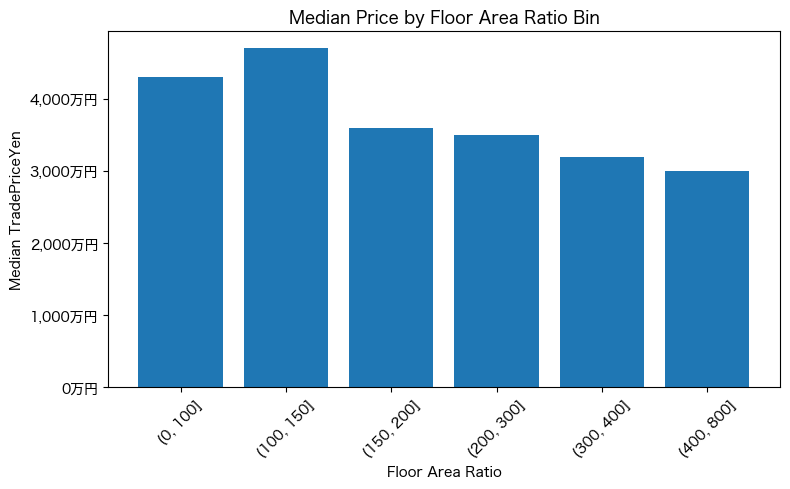

In [20]:
# Relationship with FloorAreaRatio (binned)
tmp = data.dropna(subset=['FloorAreaRatio']).copy()
bins = [0, 100, 150, 200, 300, 400, 800]
tmp['FAR_bin'] = pd.cut(tmp['FloorAreaRatio'], bins=bins)

far_price = tmp.groupby('FAR_bin')['TradePriceYen'].median()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([str(b) for b in far_price.index], far_price.values)
ax.set_title("Median Price by Floor Area Ratio Bin")
ax.set_xlabel("Floor Area Ratio")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45)
plt.tight_layout()


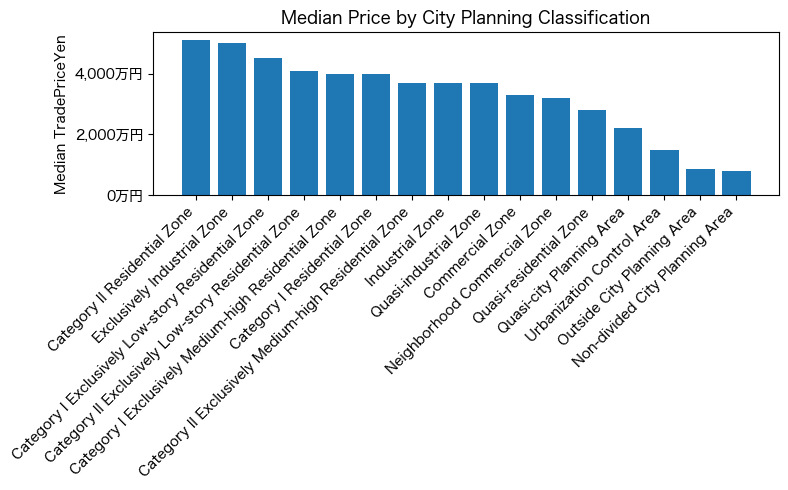

In [21]:
cp_price = (
    data.dropna(subset=['CityPlanning'])
        .groupby('CityPlanning')['TradePriceYen']
        .median()
        .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(cp_price.index, cp_price.values)
ax.set_title("Median Price by City Planning Classification")
ax.set_ylabel("Median TradePriceYen")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_48957/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tmp.groupby('bin')['TradePriceYen'].median()
/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_48957/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tmp.groupby('bin')['TradePriceYen'].median()
/var/folders/sr/1p8qj1zn0yl22k2fdqz03b080000gn/T/ipykernel_48957/3671178420.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

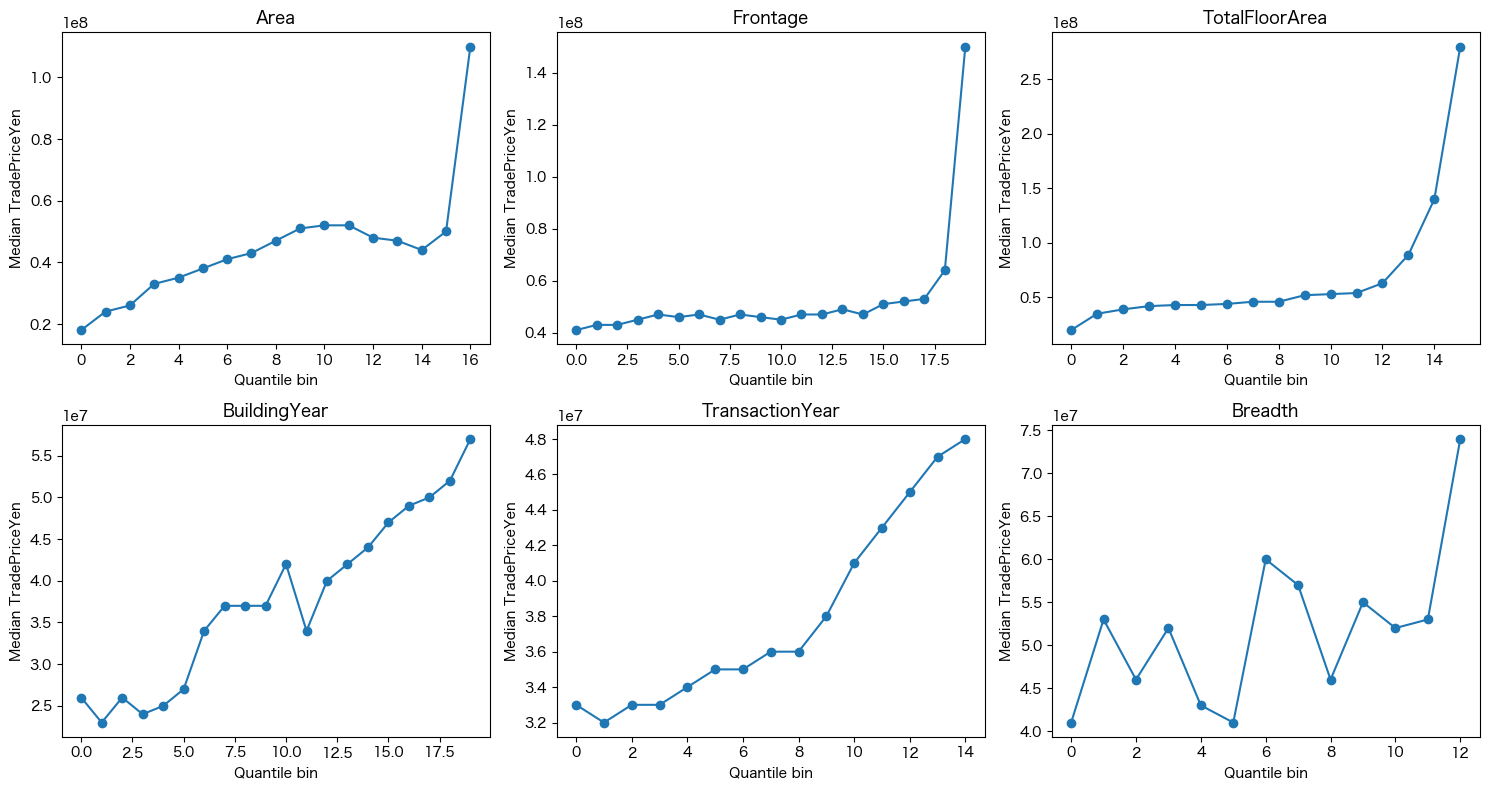

In [22]:
# todo: remove outliers from area, frontage, totalfloorarea
# add feature: buildingage = transactionyear - buildingyear

features = ['Area', 'Frontage', 'TotalFloorArea', 'BuildingYear', 'TransactionYear', 'Breadth']

n = len(features)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for ax, col in zip(axes, features):
    tmp = data[[col, 'TradePriceYen']].dropna()
    tmp['bin'] = pd.qcut(tmp[col], q=20, duplicates='drop')
    agg = tmp.groupby('bin')['TradePriceYen'].median()
    
    ax.plot(range(len(agg)), agg.values, marker='o')
    ax.set_title(col)
    ax.set_xlabel("Quantile bin")
    ax.set_ylabel("Median TradePriceYen")
    #ax.yaxis.set_major_formatter(FuncFormatter(yen_man_formatter))

# Hide any unused subplots
for ax in axes[len(features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
